# Parte 2 Avance 1 

### Equipo 2

* Antonio Mendoza Lopez
* Jesus Mario Sauceda Flores

### Objetivo.

Se planea saber en que rangos de edades se suicidan más las personas en México.

### Preguntas de Interés.
* ¿En que rangos de edades son más comunes los suicidios?
* ¿En que generacion se contempla la mayor concentracion de suicidios?

### Introducción.

La base de datos esta orientada al numero de suicidios que han ocurrido desde 1985 hasta 2016, y viene categorizado por el país donde ocurren los suicidios, el rango de edad, numero de habitantes, sexo, ingreso per capito, producto interno bruto de país, generacio y suicidios por cada 100,000 habitantes, en lo que nos enfocaremos principalmente son en los rangos de edades, ya que queremos saber si la edad afecta en la cantidad de suicidos que existen.

### Procesamiento de los Datos.

Importar las librerías.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
from matplotlib import pylab, mlab, pyplot
plt = pyplot
import openpyxl
%matplotlib inline
from pylab import *

Cargamos nuestra base de datos.

In [3]:
datos = pd.read_excel("/Users/jesus.sauceda/Desktop/Mario/TAREAS ESCUELA/Mineria de datos 7to semestre/base de datos (suicidios) pia.xlsx")
datos.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,Europe


In [4]:
datos.shape

(27820, 13)

In [5]:
datos.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
Continent              object
dtype: object

Tenemos un total de 27,820 filas pero nosotros solo requerimos las que incluyen a México, de igual manera no son necesarias todas las columnas solo dejaremos, el año el sexo, rango de edad, población y generación.

In [6]:
daton=datos.drop(["gdp_per_capita ($)","suicides/100k pop","country-year","HDI for year","gdp_for_year ($) ","Continent"],axis=1)


Ahora tenemos la base de datos modificada, ahora solo falta mostrar los datos de México.

In [7]:
daton.head()

,country,year,sex,age,suicides_no,population,generation
0,Albania,1987,male,15-24 years,21,312900,Generation X
1,Albania,1987,male,35-54 years,16,308000,Silent
2,Albania,1987,female,15-24 years,14,289700,Generation X
3,Albania,1987,male,75+ years,1,21800,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,Boomers


In [8]:
solomex=daton[daton["country"]=="Mexico"]

In [9]:
solomex.head()

,country,year,sex,age,suicides_no,population,generation
16564,Mexico,1985,male,75+ years,44,432000,G.I. Generation
16565,Mexico,1985,male,55-74 years,145,2330000,G.I. Generation
16566,Mexico,1985,male,25-34 years,340,5679000,Boomers
16567,Mexico,1985,male,35-54 years,327,5836000,Silent
16568,Mexico,1985,male,15-24 years,375,8420000,Generation X


In [10]:
solomex.shape

(372, 7)

Ahora tenemos la base de datos modificada con los datos que necesitamos para nuestro proyecto.

cambiamos el nombre de las columnas para poder trabajar mejor los datos

In [11]:
#solomex.rename(columns = {'country':'Pais','year':'Año','sex':'sexo','suicides_no':'Numero de suicidios','population':'Poblacion','generation':'Generacion','age':'Edad'})

buscaremos cuantos suicidios ocurrieron en el lado femenino como en el lado masculino

In [12]:
doc = openpyxl.load_workbook('/Users/jesus.sauceda/Desktop/Mario/TAREAS ESCUELA/Mineria de datos 7to semestre/base de datos (suicidios) pia.xlsx')

con el siguiente codigo tenemos el nombre de la hoja

In [13]:
doc.get_sheet_names()
#hombre = solomex.get_sheet_by_name('Suicide data with Continent')
#hombre.title

C:\Users\jesus.sauceda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  """Entry point for launching an IPython kernel.


['Suicide data with Continent']

asignamos el nombre de la hoja a una nueva variable

In [14]:
hoja = doc.get_sheet_by_name('Suicide data with Continent')

C:\Users\jesus.sauceda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """Entry point for launching an IPython kernel.


En el siguiente codigo sirve para poder distribuir el numero de fallecidos dependiendo si es hombre o es mujer

In [15]:
filas = hoja.max_row
hombre = 0
mujer = 0

for n in range(1,filas):
    
    if hoja.cell(column = 1, row = n).value == "Mexico":
        
        if hoja.cell(column = 3, row = n).value == "male":
            
            hombre = hoja.cell(column = 5, row = n).value + hombre
            
        else:
            
            mujer = hoja.cell(column = 5, row = n).value + mujer
        
print("estos son las cantidades de suicidios en hombres : " ,hombre)
print("estos son las cantidades de suicidios en mujeres : " ,mujer)
    


estos son las cantidades de suicidios en hombres :  91805
estos son las cantidades de suicidios en mujeres :  19334


Text(0.5, 0, 'Sexo')

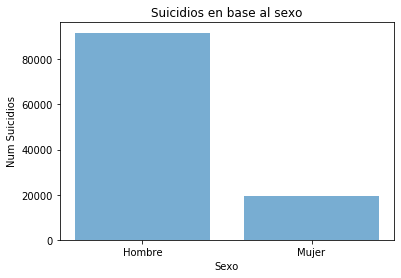

In [16]:
fig,ax =  plt.subplots()

ax.bar(("Hombre","Mujer"),(hombre,mujer),align = "center", width = 0.8, alpha = 0.6)
ax.set_title ("Suicidios en base al sexo")
ax.set_ylabel("Num Suicidios")
ax.set_xlabel("Sexo")

In [17]:
print (solomex['year'].min)

<bound method Series.min of 16564    1985
16565    1985
16566    1985
16567    1985
16568    1985
         ... 
16931    2015
16932    2015
16933    2015
16934    2015
16935    2015
Name: year, Length: 372, dtype: int64>


Podemos observar que la cantidad de suicidios ocasionados en mexico entre el periodo de 1985 hasta el 2015 fue por parte de los hombres 91,805 suicidios, en cambio las mujeres fueron 19,334 suicidios.

In [18]:
filas = hoja.max_row
Boomers = 0
Silent = 0
GenerationX = 0
Millenials = 0
G = 0
z = 0

for n in range(1,filas):
    
    if hoja.cell(column = 1, row = n).value == "Mexico":
        
        if hoja.cell(column = 12, row = n).value == "Boomers":
            
            Boomers = hoja.cell(column = 5, row = n).value + Boomers
            
        elif hoja.cell(column = 12, row = n).value == "Silent":
            
            Silent = hoja.cell(column = 5, row = n).value + Silent
            
        elif hoja.cell(column = 12, row = n).value == "Generation X":
            
            GenerationX = hoja.cell(column = 5, row = n).value + GenerationX
        
        elif hoja.cell(column = 12, row = n).value == "Millenials":
            
            Millenials = hoja.cell(column = 5, row = n).value + Millenials
            
        elif hoja.cell(column = 12, row = n).value == "G.I. Generation":
            
            G = hoja.cell(column = 5, row = n).value + G
        
        elif hoja.cell(column = 12, row = n).value == "Generation Z":
            
            z = hoja.cell(column = 5, row = n).value + z
                    
        

            
print("estos son las cantidades de suicidios en la Generacion Boomers : " ,Boomers)
print("estos son las cantidades de suicidios en la Genereacion Silent : " ,Silent)
print("estos son las cantidades de suicidios en la Generacion X : " ,GenerationX)
print("estos son las cantidades de suicidios en la Genereacion G.I. Generation : ",G)
print("estos son las cantidades de suicidios en la Genereacion Millenials : " ,Millenials)
print("estos son las cantidades de suicidios en la Genereacion Z : " ,z)    

estos son las cantidades de suicidios en la Generacion Boomers :  25466
estos son las cantidades de suicidios en la Genereacion Silent :  12948
estos son las cantidades de suicidios en la Generacion X :  38546
estos son las cantidades de suicidios en la Genereacion G.I. Generation :  2772
estos son las cantidades de suicidios en la Genereacion Millenials :  29628
estos son las cantidades de suicidios en la Genereacion Z :  1779


Text(0, 0.5, 'Num Suicidios')

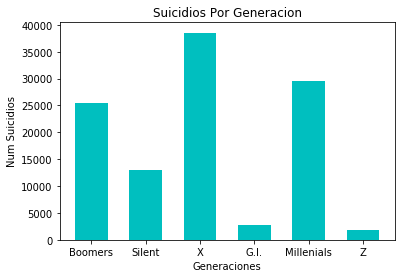

In [19]:
fig, ex = plt.subplots()

ex.bar(("Boomers","Silent","X", "G.I.","Millenials","Z"),(Boomers,Silent,GenerationX,G,Millenials,z),align="center",width = 0.6,color = "c")
ex.set_title("Suicidios Por Generacion")
ex.set_xlabel("Generaciones")
ex.set_ylabel("Num Suicidios")

En este graficos nos podemos dar la idea de la cantidad de suicidios que se generaron dependiendo la generacion.
la Generacion que tuvo mas impacto en cuanto a los suicidos vemos que fue la Generacion X con una cantidad de 38,546 suicidios y la que menos suicidios tuvo fue la generacion Z con una cantidad de 1,779 suicidios

Con este segundo grafico podemos contestar la segunda pregunta de interes acerca de la cantidad de suicidios que hubo por generacion, como ya mencionado en el grafico anterior se concluyo que la mayor concentracion de suicidios fue en la generacion X y esto se debe a que dicha generacion estuvo en constantes cambio de tecnologia, tambien fue la generacion del divorcio, las madres solteras, los nuevos nucleos familiares (ejemplo: hombre-hombre)y fue una generacion que estuvo en constante lucha contra la depresion por esas causas y muchas, es la cantidad de suicidios

Lo que haremos ahora es hacer un grafico munidal dividido por las mismas 6 generaciones para observar el comportamiento, y ver si tiene alguna similitud respecto al Grafico de Mexico

In [20]:
filas = hoja.max_row
Boomers = 0
Silent = 0
GenerationX = 0
Millenials = 0
G = 0
z = 0

for n in range(1,filas):
          
        if hoja.cell(column = 12, row = n).value == "Boomers":
            
            Boomers = hoja.cell(column = 5, row = n).value + Boomers
            
        elif hoja.cell(column = 12, row = n).value == "Silent":
            
            Silent = hoja.cell(column = 5, row = n).value + Silent
            
        elif hoja.cell(column = 12, row = n).value == "Generation X":
            
            GenerationX = hoja.cell(column = 5, row = n).value + GenerationX
        
        elif hoja.cell(column = 12, row = n).value == "Millenials":
            
            Millenials = hoja.cell(column = 5, row = n).value + Millenials
            
        elif hoja.cell(column = 12, row = n).value == "G.I. Generation":
            
            G = hoja.cell(column = 5, row = n).value + G
        
        elif hoja.cell(column = 12, row = n).value == "Generation Z":
            
            z = hoja.cell(column = 5, row = n).value + z
                    
print("estos son las cantidades de suicidios en la Generacion Boomers : " ,Boomers)
print("estos son las cantidades de suicidios en la Genereacion Silent : " ,Silent)
print("estos son las cantidades de suicidios en la Generacion X : " ,GenerationX)
print("estos son las cantidades de suicidios en la Genereacion G.I. Generation : ",G)
print("estos son las cantidades de suicidios en la Genereacion Millenials : " ,Millenials)
print("estos son las cantidades de suicidios en la Genereacion Z : " ,z)    

estos son las cantidades de suicidios en la Generacion Boomers :  2284477
estos son las cantidades de suicidios en la Genereacion Silent :  1781744
estos son las cantidades de suicidios en la Generacion X :  1532804
estos son las cantidades de suicidios en la Genereacion G.I. Generation :  510009
estos son las cantidades de suicidios en la Genereacion Millenials :  623459
estos son las cantidades de suicidios en la Genereacion Z :  15906


Text(0, 0.5, 'Num Suicidios')

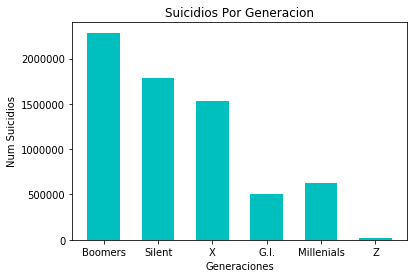

In [21]:
fig,mundial = plt.subplots()

mundial.bar(("Boomers","Silent","X", "G.I.","Millenials","Z"),(Boomers,Silent,GenerationX,G,Millenials,z),align="center",width = 0.6,color = "c")
mundial.set_title("Suicidios Por Generacion")
mundial.set_xlabel("Generaciones")
mundial.set_ylabel("Num Suicidios")


Bueno, como podemos ver en este grafico de Nivel Mundial la generacion mas afectada fueron los baby boomers conocidos asi por la cantidad de bebes que llegaron a la tierra fueron aproximadamente 76.4 millones de bebes pero la pregunta seria porque fue la mas afectada en cuanto a los suicidios, tuvo eventos muy significativos por ejemplo : La Guerra Fria, Los asesinatos de Martin luther king Jr y De John F Kennedy y Los movimientos por los derechos civiles entre otro acontecimientos importantes, estos datos fueron presentados para tener una vision sobre el impacto de las Generaciones alrededor del mundo y ver como la generacion X no fue la mas importante en cuanto al punto de vista de los suicidios

En el siguiente grafico nos centraremos en los suicidios de hombres y mujeres de la generacion X ubicados en Mexico

In [22]:
filas = hoja.max_row
hombre = 0
mujer = 0

for n in range(1,filas):
    
    if hoja.cell(column = 1, row = n).value == "Mexico":
        
        if hoja.cell(column = 12, row = n).value == "Generation X":
            
            if hoja.cell(column = 3,row = n).value == "male":
                
                hombre = hoja.cell(column = 5, row = n).value + hombre
                
            elif hoja.cell(column = 3, row = n).value == "female":
                
                mujer += hoja.cell(column = 5, row = n).value
        
        

print("Los suicidios de hombres fueron : ", hombre)
print("Los suicidios de mujeres fueron : ", mujer)

Los suicidios de hombres fueron :  32110
Los suicidios de mujeres fueron :  6436


<BarContainer object of 2 artists>

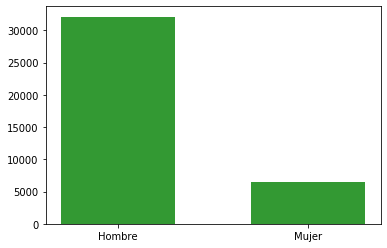

In [23]:
fig, grafico = plt.subplots()

grafico.bar(("Hombre","Mujer"),(hombre,mujer),color = "g", alpha = 0.8, width = 0.6, align = "center")

El Grafico se explica muy detalladamente, sobre la imponencia de suicidios por el lado del hombre

Ya una vez analizado la categoria de Generacion, pasaremos al analisis de años que lo explicaremos con un pequeño grafico de dispersion.
Primero buscaremos cuantos datos individuales tiene la columna años

In [26]:
anios = solomex['year'].unique()

anios

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

Una vez que tenemos los datos individuales seguimos con el agrupamiento de suicidios que le corresponde a cada uno

In [47]:
cantidad_por_anio = []
total_anios = 0

for i in range(0,len(anios)):
    
    for n in range(1,filas):
        
        if hoja.cell(column = 1, row = n).value == "Mexico":
            
            if hoja.cell(column = 2, row = n).value == anios[i]:
                
                total_anios = hoja.cell(column = 5, row = n).value + total_anios
    
    cantidad_por_anio.append(total_anios)
    total_anios = 0

print("Los años contemplados en Mexico y la cantidad de suicidios de cada uno.")
for n in range(0,len(anios)):
    
    print(anios[n]," ----> ", cantidad_por_anio[n])
    

Los años contemplados en Mexico y la cantidad de suicidios de cada uno.
1985  ---->  1544
1986  ---->  1714
1987  ---->  1701
1988  ---->  1703
1989  ---->  1865
1990  ---->  1926
1991  ---->  2103
1992  ---->  2237
1993  ---->  2342
1994  ---->  2588
1995  ---->  2877
1996  ---->  3008
1997  ---->  3350
1998  ---->  3312
1999  ---->  3327
2000  ---->  3456
2001  ---->  3760
2002  ---->  3826
2003  ---->  4070
2004  ---->  4056
2005  ---->  4274
2006  ---->  4230
2007  ---->  4285
2008  ---->  4642
2009  ---->  5023
2010  ---->  4858
2011  ---->  5558
2012  ---->  5381
2013  ---->  5711
2014  ---->  6178
2015  ---->  6234


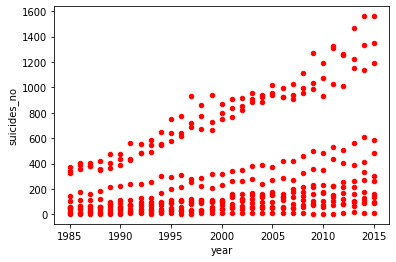

In [61]:
solomex[solomex['country'] == 'Mexico'].plot.scatter(x='year', y='suicides_no', color = 'r')

En la primera representacion de numeros haciendo la comparacion de años respecto la cantidad de suicidios, podemos observar la cantidad de suicidos por cada años, respecto al grafico nos podemos dar cuenta como la dispersion va aumentando cada vez mas conforme los años van creciendo, vemo que en el año 1985 tenemos un rango entre 200-400 obteniendo una cantidad total de 1544 mientras para el año 2015 apesar de tener una mayor concentracion en 200-300 suicidios tenemos una cantidad total de 6234

Text(0, 0.5, 'Num Suicidios')

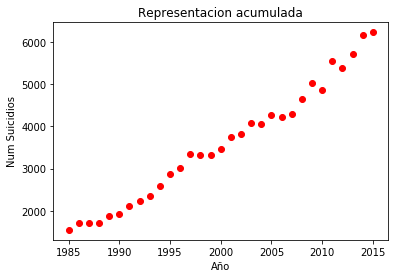

In [60]:
fig, grafico = plt.subplots()

grafico.scatter(anios,cantidad_por_anio,color='r')
grafico.set_title("Representacion acumulada")
grafico.set_xlabel("Año")
grafico.set_ylabel("Num Suicidios")

Una Mejor representacion respecto al grafico de Año - Cantidad de suicidios

In [2]:
edad = solomex['age'].unique()
edad

NameError: name 'solomex' is not defined

In [1]:
e = edad[2]
e

NameError: name 'edad' is not defined